In [1]:
import pandas as pd
import numpy as np
referendum = pd.DataFrame(pd.read_csv('data/referendum.csv', sep = ';', error_bad_lines = False))
regions = pd.DataFrame(pd.read_csv('data/regions.csv'))
departments = pd.DataFrame(pd.read_csv('data/departments.csv'))

<ipython-input-1-8457f57caee7>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  referendum = pd.DataFrame(pd.read_csv('data/referendum.csv', sep = ';', error_bad_lines = False))


In [2]:
regions

,id,code,name,slug
0,1,01,Guadeloupe,guadeloupe
1,2,02,Martinique,martinique
2,3,03,Guyane,guyane
3,4,04,La Réunion,la reunion
4,5,06,Mayotte,mayotte
5,6,11,Île-de-France,ile de france
6,7,24,Centre-Val de Loire,centre val de loire
7,8,27,Bourgogne-Franche-Comté,bourgogne franche comte
8,9,28,Normandie,normandie
9,10,32,Hauts-de-France,hauts de france


In [3]:
departments

,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes
...,...,...,...,...,...
104,105,COM,984,Terres australes et antarctiques françaises,terres australes et antarctiques francaises
105,106,COM,986,Wallis et Futuna,wallis et futuna
106,107,COM,987,Polynésie française,polynesie francaise
107,108,COM,988,Nouvelle-Calédonie,nouvelle caledonie


In [13]:
areas = pd.merge(regions, departments, left_on = 'code', right_on = 'region_code', how = 'left', suffixes = ('_reg', '_dep'))[['code_reg', 'name_reg', 'code_dep', 'name_dep']]
areas

,code_reg,name_reg,code_dep,name_dep
0,01,Guadeloupe,971,Guadeloupe
1,02,Martinique,972,Martinique
2,03,Guyane,973,Guyane
3,04,La Réunion,974,La Réunion
4,06,Mayotte,976,Mayotte
...,...,...,...,...
104,COM,Collectivités d'Outre-Mer,984,Terres australes et antarctiques françaises
105,COM,Collectivités d'Outre-Mer,986,Wallis et Futuna
106,COM,Collectivités d'Outre-Mer,987,Polynésie française
107,COM,Collectivités d'Outre-Mer,988,Nouvelle-Calédonie


In [14]:
areas['code_dep'] = areas['code_dep'].apply(lambda x: x[1:] if x[0] == '0' else x)
referendum_and_areas = pd.merge(referendum, areas, left_on = 'Department code', right_on = 'code_dep')
referendum_and_areas = referendum_and_areas[ ~ referendum_and_areas['Department code'].str.startswith('Z')]

In [15]:
#referendum_and_areas.set_index('code_reg')
referendum_result_by_regions = referendum_and_areas.groupby(['code_reg', 'name_reg']).aggregate(sum).drop(columns = 'Town code')
referendum_result_by_regions = referendum_result_by_regions.reset_index('name_reg')
referendum_result_by_regions

<ipython-input-15-ac5475a74c23>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  referendum_result_by_regions = referendum_and_areas.groupby(['code_reg', 'name_reg']).aggregate(sum).drop(columns = 'Town code')


,name_reg,Registered,Abstentions,Null,Choice A,Choice B
code_reg,,,,,,
11,Île-de-France,6942361,1515884,85997,2536620,2803860
24,Centre-Val de Loire,1801366,326560,28827,590890,855089
27,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687
28,Normandie,2372779,426075,35513,816972,1094219
32,Hauts-de-France,4210444,866555,60601,1411257,1872031
44,Grand Est,3857089,783348,56951,1088684,1928106
52,Pays de la Loire,2605438,412509,47677,922468,1222784
53,Bretagne,2380594,364724,36077,944052,1035741
75,Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879


In [16]:
import geopandas as gpd

* Load the geographic data with geopandas from `regions.geojson`.
    * Merge these info into `referendum_result_by_regions`.
    * Use the method `GeoDataFrame.plot` to display the result map. The results
      should display the rate of 'Choice A' over all expressed ballots.
    * Return a gpd.GeoDataFrame with a column 'ratio' containing the results.

In [17]:
coordinates = gpd.read_file('data/regions.geojson')
referendum_result_by_regions_coordinates = referendum_result_by_regions.merge(coordinates, left_on = 'code_reg', right_on = 'code').drop(columns = 'nom')

In [18]:
referendum_result_by_regions_coordinates['Choice A rate'] = referendum_result_by_regions_coordinates['Choice A'] / (referendum_result_by_regions_coordinates['Null']+referendum_result_by_regions_coordinates['Choice A'] + referendum_result_by_regions_coordinates['Choice B'])

NameError: name 'plt' is not defined

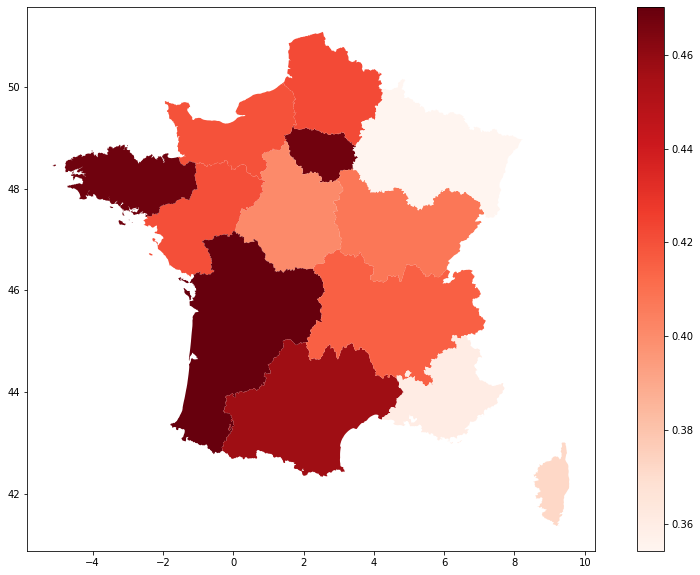

In [19]:
gpd.GeoDataFrame(referendum_result_by_regions_coordinates).plot('Choice A rate', legend = True, figsize = (15, 10), cmap = 'Reds')
plt.title('Choice A rate per region in France')

In [22]:
referendum_result_by_regions_coordinates['ratio'] = referendum_result_by_regions_coordinates['Choice A']/(referendum_result_by_regions_coordinates['Choice A'] + referendum_result_by_regions_coordinates['Choice B'])
referendum_result_by_regions_coordinates

,name_reg,Registered,Abstentions,Null,Choice A,Choice B,code,geometry,Choice A rate,ratio
0,Île-de-France,6942361,1515884,85997,2536620,2803860,11,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",0.467452,0.474980
1,Centre-Val de Loire,1801366,326560,28827,590890,855089,24,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",0.400656,0.408644
2,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687,27,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",0.407565,0.416111
3,Normandie,2372779,426075,35513,816972,1094219,28,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",0.419669,0.427467
4,Hauts-de-France,4210444,866555,60601,1411257,1872031,32,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",0.422041,0.429830
5,Grand Est,3857089,783348,56951,1088684,1928106,44,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",0.354189,0.360875
6,Pays de la Loire,2605438,412509,47677,922468,1222784,52,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",0.420656,0.430004
7,Bretagne,2380594,364724,36077,944052,1035741,53,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",0.468310,0.476844
8,Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879,75,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",0.470170,0.480020
9,Occitanie,4008516,660914,62732,1528980,1755890,76,"MULTIPOLYGON (((1.78613 42.57362, 1.78094 42.5...",0.456739,0.465461
